In [124]:
import pandas as pd
import numpy as np

# Regression Model

In [125]:
df=pd.read_csv("day.csv")

In [126]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [128]:
df.isnull()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
727,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
728,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
729,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [129]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [130]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [131]:
le=LabelEncoder()

In [132]:
df['dteday'] = le.fit_transform(df['dteday'])

In [133]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,3,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,4,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [134]:
x = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [135]:
x

array([[1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.60446e-01,
        3.31000e+02, 6.54000e+02],
       [2.00000e+00, 1.00000e+00, 1.00000e+00, ..., 2.48539e-01,
        1.31000e+02, 6.70000e+02],
       [3.00000e+00, 2.00000e+00, 1.00000e+00, ..., 2.48309e-01,
        1.20000e+02, 1.22900e+03],
       ...,
       [7.29000e+02, 7.28000e+02, 1.00000e+00, ..., 1.24383e-01,
        1.59000e+02, 1.18200e+03],
       [7.30000e+02, 7.29000e+02, 1.00000e+00, ..., 3.50754e-01,
        3.64000e+02, 1.43200e+03],
       [7.31000e+02, 7.30000e+02, 1.00000e+00, ..., 1.54846e-01,
        4.39000e+02, 2.29000e+03]])

In [136]:
y

array([ 985,  801, 1349, 1562, 1600, 1606, 1510,  959,  822, 1321, 1263,
       1162, 1406, 1421, 1248, 1204, 1000,  683, 1650, 1927, 1543,  981,
        986, 1416, 1985,  506,  431, 1167, 1098, 1096, 1501, 1360, 1526,
       1550, 1708, 1005, 1623, 1712, 1530, 1605, 1538, 1746, 1472, 1589,
       1913, 1815, 2115, 2475, 2927, 1635, 1812, 1107, 1450, 1917, 1807,
       1461, 1969, 2402, 1446, 1851, 2134, 1685, 1944, 2077,  605, 1872,
       2133, 1891,  623, 1977, 2132, 2417, 2046, 2056, 2192, 2744, 3239,
       3117, 2471, 2077, 2703, 2121, 1865, 2210, 2496, 1693, 2028, 2425,
       1536, 1685, 2227, 2252, 3249, 3115, 1795, 2808, 3141, 1471, 2455,
       2895, 3348, 2034, 2162, 3267, 3126,  795, 3744, 3429, 3204, 3944,
       4189, 1683, 4036, 4191, 4073, 4400, 3872, 4058, 4595, 5312, 3351,
       4401, 4451, 2633, 4433, 4608, 4714, 4333, 4362, 4803, 4182, 4864,
       4105, 3409, 4553, 3958, 4123, 3855, 4575, 4917, 5805, 4660, 4274,
       4492, 4978, 4677, 4679, 4758, 4788, 4098, 39

In [137]:
ohe=OneHotEncoder()

In [138]:
z = ohe.fit_transform(x[:,1:2]).toarray()

In [139]:
z

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [140]:
x

array([[1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.60446e-01,
        3.31000e+02, 6.54000e+02],
       [2.00000e+00, 1.00000e+00, 1.00000e+00, ..., 2.48539e-01,
        1.31000e+02, 6.70000e+02],
       [3.00000e+00, 2.00000e+00, 1.00000e+00, ..., 2.48309e-01,
        1.20000e+02, 1.22900e+03],
       ...,
       [7.29000e+02, 7.28000e+02, 1.00000e+00, ..., 1.24383e-01,
        1.59000e+02, 1.18200e+03],
       [7.30000e+02, 7.29000e+02, 1.00000e+00, ..., 3.50754e-01,
        3.64000e+02, 1.43200e+03],
       [7.31000e+02, 7.30000e+02, 1.00000e+00, ..., 1.54846e-01,
        4.39000e+02, 2.29000e+03]])

In [141]:
x=np.delete(x,1,axis=1)

In [142]:
x

array([[1.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.60446e-01,
        3.31000e+02, 6.54000e+02],
       [2.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.48539e-01,
        1.31000e+02, 6.70000e+02],
       [3.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.48309e-01,
        1.20000e+02, 1.22900e+03],
       ...,
       [7.29000e+02, 1.00000e+00, 1.00000e+00, ..., 1.24383e-01,
        1.59000e+02, 1.18200e+03],
       [7.30000e+02, 1.00000e+00, 1.00000e+00, ..., 3.50754e-01,
        3.64000e+02, 1.43200e+03],
       [7.31000e+02, 1.00000e+00, 1.00000e+00, ..., 1.54846e-01,
        4.39000e+02, 2.29000e+03]])

In [143]:
x = np.concatenate((z,x),axis=1)

In [144]:
x

array([[1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.60446e-01,
        3.31000e+02, 6.54000e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.48539e-01,
        1.31000e+02, 6.70000e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 2.48309e-01,
        1.20000e+02, 1.22900e+03],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.24383e-01,
        1.59000e+02, 1.18200e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.50754e-01,
        3.64000e+02, 1.43200e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.54846e-01,
        4.39000e+02, 2.29000e+03]])

In [145]:
x=np.delete(x,0,axis=1)

In [146]:
x

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.60446e-01,
        3.31000e+02, 6.54000e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 2.48539e-01,
        1.31000e+02, 6.70000e+02],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 2.48309e-01,
        1.20000e+02, 1.22900e+03],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.24383e-01,
        1.59000e+02, 1.18200e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 3.50754e-01,
        3.64000e+02, 1.43200e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.54846e-01,
        4.39000e+02, 2.29000e+03]])

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
sc = StandardScaler()

In [149]:
x=sc.fit_transform(x)

In [150]:
x

array([[-0.03701166, -0.03701166, -0.03701166, ..., -0.38789169,
        -0.7537338 , -1.9254707 ],
       [27.01851217, -0.03701166, -0.03701166, ...,  0.74960172,
        -1.04521412, -1.91520896],
       [-0.03701166, 27.01851217, -0.03701166, ...,  0.74663186,
        -1.06124554, -1.5566892 ],
       ...,
       [-0.03701166, -0.03701166, -0.03701166, ..., -0.85355213,
        -1.00440687, -1.58683308],
       [-0.03701166, -0.03701166, -0.03701166, ...,  2.06944426,
        -0.70563955, -1.42649329],
       [-0.03701166, -0.03701166, -0.03701166, ..., -0.46020122,
        -0.59633443, -0.87620714]])

In [151]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [152]:
xtrain.shape

(584, 744)

In [153]:
xtest.shape

(147, 744)

In [154]:
ytrain.shape

(584,)

In [155]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(xtrain,ytrain)

LinearRegression()

In [156]:
ypred = mlr.predict(xtest)

In [157]:
ypred

array([5002.27540609, 4739.44571563, 1010.34613642, 1192.0393754 ,
       3376.02407288, 2578.05786164, 3203.02110754, 6027.41851834,
       5757.541096  ,  979.16842329, 1658.15512927, 2155.12044686,
       1509.53415613, 4635.20690509, 4722.38783197, 3772.71611026,
       6737.21177244, 5800.76412588, 3473.825695  , 2289.96719377,
       6915.53568393, 2749.86776278, 5448.06222256, 4192.90886155,
       1886.04082491, 5032.160504  , 4675.03547616, 4898.84361738,
       6894.31014343, 6346.68687733, 1036.88413338, 4866.11069632,
       5544.55418746, 4699.29974072, 2884.85873844, 3452.37622014,
       6619.98228165, 5913.29009825, 2731.45626466, 3359.08436904,
       5433.58249117, 1041.75510508, 4743.54534846, 3312.29827596,
       6771.28885708, 6743.08575356, 2693.95882572, 3585.37526759,
       2365.0961138 , 1748.85961394, 5834.46766844, 6640.79375777,
       4889.65418963, 6318.53719224, 4293.14094063, 3751.9136562 ,
       3760.98400284, 6401.12295635, 6681.18595384, 3396.34139

In [158]:
ytest.shape

(147,)

In [159]:
ytest.reshape(-1,)

array([5923, 4592, 1248, 1360, 4075, 1817, 2659, 6234, 6857, 1167, 1538,
       1162, 1461, 4833, 4342, 4010, 7525, 6536, 3376, 2077, 7713, 1341,
       5259, 4460, 1977, 4549, 3387, 5058, 7907, 8120,  822, 5115, 6392,
       5202, 2209, 4023, 6861, 4840, 2744, 2914, 6624,  801, 4839, 3487,
       7580, 7436, 1951, 3351, 2832, 1693, 6043, 6966, 5572, 7421, 4576,
       3071, 3613, 7461, 7105, 3272, 7290, 4318, 4073, 8714, 7494, 1996,
       5202, 5382, 6536, 5566, 6572, 7264, 4996, 6597, 3267, 6606, 5847,
       6883, 2431, 1796, 4475, 5107, 5362, 1812, 5010, 7665, 4792, 6169,
       4459, 4274, 1263,  623, 6904, 7175, 2843, 1013,  627, 7261, 3574,
       3830, 4352, 6233, 5170, 7691, 3523, 4302, 7693, 7415, 6041, 2660,
       4191, 3542, 3544, 1635, 2169, 4548, 4763, 4451, 7359, 5936, 1712,
       4507, 2927, 2294, 4195, 4630, 1650, 7001, 3129, 3239,  605, 5464,
       1450, 4304, 4270, 6153, 7132, 4539, 4985, 5345, 4220, 4595, 5870,
       5499, 5423, 8294, 4334], dtype=int64)

In [160]:
ypred.shape

(147,)

In [161]:
ytest.shape

(147,)

## MSE:MeanSquaredError

In [162]:
from sklearn.metrics import mean_squared_error

In [163]:
mse=mean_squared_error(ytest,ypred)

In [164]:
mse

491787.95172853395

## RMSE:Root Mean Square Error

In [165]:
from math import sqrt
rmse=sqrt(mse)

In [166]:
rmse

701.2759454940216

## R2 Score

In [167]:
from sklearn.metrics import r2_score
r2_score(ytest,ypred)

0.8843706943455272

# Classification Model

In [168]:
dfc=pd.read_csv('diabetes.csv')

In [169]:
dfc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,1,85,66,29,0,26.6,0.351,31,neg
2,8,183,64,0,0,23.3,0.672,32,pos
3,1,89,66,23,94,28.1,0.167,21,neg
4,0,137,40,35,168,43.1,2.288,33,pos
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,neg
764,2,122,70,27,0,36.8,0.340,27,neg
765,5,121,72,23,112,26.2,0.245,30,neg
766,1,126,60,0,0,30.1,0.349,47,pos


In [170]:
dfc.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetes                    0
dtype: int64

In [171]:
dfc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Diabetes                  768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [172]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dfc['Diabetes']=lb.fit_transform(dfc['Diabetes'])

In [173]:
x= dfc.iloc[:,0:-1].values
y=dfc.iloc[:,-1:].values

In [174]:
x.shape

(768, 8)

In [175]:
y.shape

(768, 1)

In [176]:
#Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
x= sc.fit_transform(x)

In [177]:
x

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [178]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=0)

In [179]:
xtrain.shape

(614, 8)

In [180]:
ytrain.shape

(614, 1)

In [181]:
xtest.shape

(154, 8)

In [182]:
ytest.shape

(154, 1)

In [183]:
# Logistic Regression

In [184]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(xtrain,ytrain)

C:\Users\fiza\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [185]:
ylg=lg.predict(xtest)

In [186]:
ylg

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [187]:
ytest.shape

(154, 1)

In [188]:
ylg.shape

(154,)

In [190]:
ytest.reshape(-1)

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

## accuracy score

In [193]:
from sklearn.metrics import accuracy_score
accuracy_score(ylg,ytest)

0.8246753246753247

## confusion martix

In [194]:
from sklearn.metrics import confusion_matrix
cndt=confusion_matrix(ylg,ytest)
cndt

array([[98, 18],
       [ 9, 29]], dtype=int64)

## auc_roc curve

In [218]:
import sklearn.metrics as metrics

In [219]:
fpr,tpr,threshold=metrics.roc_curve(yknn,ytest)

In [220]:
roc_auc=metrics.auc(fpr,tpr)

In [221]:
roc_auc

0.7722606327257491

In [222]:
from matplotlib import pyplot as plt

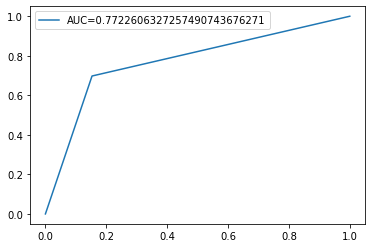

In [223]:
plt.plot(fpr,tpr,label='AUC=%0.25f'%roc_auc)
plt.legend()
plt.show()

In [198]:
# KNN

In [199]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)

<ipython-input-199-227eca623bf6>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(xtrain,ytrain)


KNeighborsClassifier()

In [200]:
yknn = knn.predict(xtest)

In [201]:
yknn

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [203]:
ytest.reshape(1,-1)

array([[1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0]])

## accuracy score

In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(yknn, ytest)

0.8051948051948052

## confusion Matrix

In [207]:
from sklearn.metrics import confusion_matrix
cndt=confusion_matrix(yknn,ytest)
cndt

array([[94, 17],
       [13, 30]], dtype=int64)

## Auc_roc curve

In [211]:
import sklearn.metrics as metrics

In [212]:
fpr,tpr,threshold=metrics.roc_curve(yknn,ytest)

In [213]:
roc_auc=metrics.auc(fpr,tpr)

In [214]:
roc_auc

0.7722606327257491

In [216]:
from matplotlib import pyplot as plt

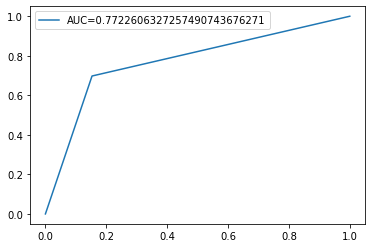

In [217]:
plt.plot(fpr,tpr,label='AUC=%0.25f'%roc_auc)
plt.legend()
plt.show()